# Create noise simulation on a track

This tutorial is going to show how generate noise simulation to create synthetic tracks. .
<br/>
<div class="alert alert-block alert-info" style="padding:1em">
    
```python
  amplitude = 2
  kernel = tkl.GaussianKernel(50)
  noised_track = track.noise(amplitude, kernel, cycle=True, force=True)
```

</div>

## As usual, let's start by defining our environment

The first task is only useful for the online notebook and import the local tracklib code source. It's not necessary if tracklib is installed from PyPI.

In [1]:
import matplotlib.pyplot as plt
import os.path
import sys

#-------------------------------------------------------
# Import de tracklib
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import tracklib as tkl

The following two imports are necessary for the tutorial:

In [2]:
import math
import matplotlib.pyplot as plt
from random import random, randint

## Three data: a building, a circle and a path

([], [])

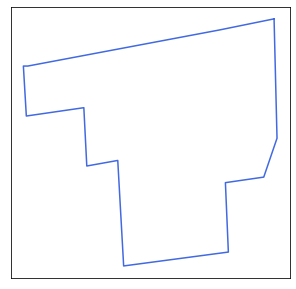

In [3]:
param = tkl.TrackFormat({'ext': 'WKT', 'id_wkt': 0, 'separator': ',', 'header': 1})

batis = tkl.TrackReader.readFromFile("../../../data/radial/bati_bdtopo.wkt", param)
#bati1 = batis[234]
bati = batis[305]

plt.figure(figsize=(5, 5))
plt.plot(bati.getX(), bati.getY(), color="royalblue", linestyle='-')
plt.xticks([]) 
plt.yticks([]) 

Generated track from 20/10/1978 03:24:12 to 20/10/1978 04:24:12 [719 pts, 62.74m]


Text(0.5, 1.0, '')

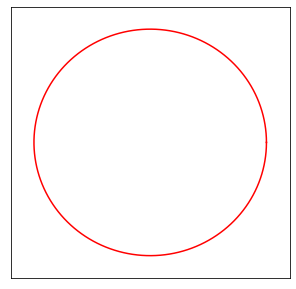

In [4]:
def x_t(t):
    return 10*math.cos(2*math.pi*t)
def y_t(t):
    return 10*math.sin(2*math.pi*t)

plt.figure(figsize=(5, 5))
circle = tkl.generate(x_t, y_t, dt=5)
tkl.resample(circle, 0.1, 1, 1)
if not ((circle.getX()[-1] == circle.getX()[0]) and (circle.getY()[-1] == circle.getY()[0])):
    circle.addObs(circle[0])
circle.plot('r-')
plt.xticks([]); plt.yticks([]) ; plt.xlabel(''); plt.ylabel(''); plt.title('')

Generated track from 20/07/2046 04:48:07 to 20/07/2046 05:48:07 [100 pts, 147.76m]


Text(0.5, 1.0, '')

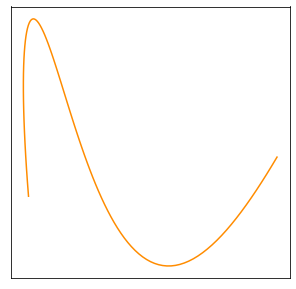

In [5]:
tkl.seed(14380247)

sentier = tkl.generate(0.20)

plt.figure(figsize=(5, 5))
plt.plot(sentier.getX(), sentier.getY(), color="darkorange", linestyle='-')
plt.xticks([]); plt.yticks([]) ; plt.xlabel(''); plt.ylabel(''); plt.title('')

## Generate noise

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


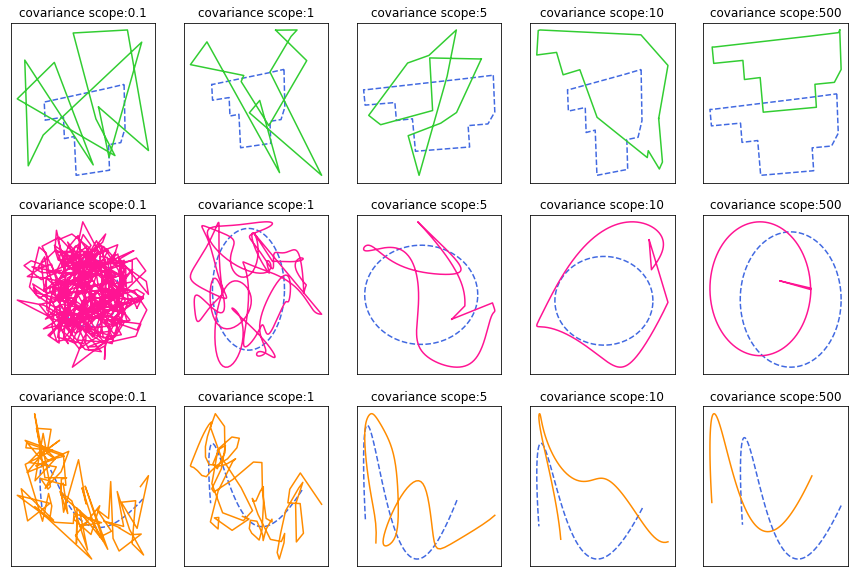

In [6]:
tkl.seed(123)

amp = 5
N = 5
SCOPES = [0.1, 1, 5, 10, 500]

plt.figure(figsize=(3*N, 2*N))

for i in range(N):
    kernel = tkl.GaussianKernel(SCOPES[i])
    b2 = bati.noise(amp, kernel, cycle=True, force=True)
    if not ((b2.getX()[-1] == b2.getX()[0]) and (b2.getY()[-1] == b2.getY()[0])):
        b2.addObs(b2[0])
    
    ax = plt.subplot2grid((3, N), (0,i))
    ax.set_title('covariance scope:' + str(SCOPES[i]))
    ax.plot(bati.getX(), bati.getY(), color="royalblue", linestyle='--')
    ax.plot(b2.getX(), b2.getY(), color="limegreen", linestyle='-')
    ax.set_xticks([]) 
    ax.set_yticks([]) 

for i in range(N):
    kernel = tkl.GaussianKernel(SCOPES[i])
    b2 = circle.noise(amp, kernel, cycle=True, force=True)
    if not ((b2.getX()[-1] == b2.getX()[0]) and (b2.getY()[-1] == b2.getY()[0])):
        b2.addObs(b2[0])
    
    ax = plt.subplot2grid((3, N), (1,i))
    ax.set_title('covariance scope:' + str(SCOPES[i]))
    ax.plot(circle.getX(), circle.getY(), color="royalblue", linestyle='--')
    ax.plot(b2.getX(), b2.getY(), color="deeppink", linestyle='-')
    ax.set_xticks([]) 
    ax.set_yticks([])

for i in range(N):
    kernel = tkl.GaussianKernel(SCOPES[i])
    b2 = sentier.noise(amp, kernel, cycle=True, force=True)
    #if not ((b2.getX()[-1] == b2.getX()[0]) and (b2.getY()[-1] == b2.getY()[0])):
    #    b2.addObs(b2[0])
    
    ax = plt.subplot2grid((3, N), (2,i))
    ax.set_title('covariance scope:' + str(SCOPES[i]))
    ax.plot(sentier.getX(), sentier.getY(), color="royalblue", linestyle='--')
    ax.plot(b2.getX(), b2.getY(), color="darkorange", linestyle='-')
    ax.set_xticks([]) 
    ax.set_yticks([])

## Create Synthetic Trajectories

Generated track from 05/02/2042 00:44:56 to 05/02/2042 01:44:56 [360 pts, 70.36m]
10


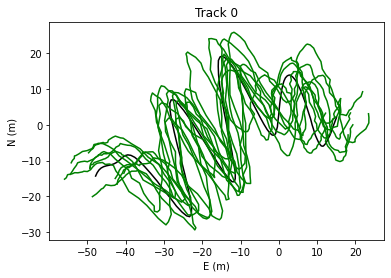

In [7]:
tkl.seed(123)

base_lacets = tkl.generate(0.4, dt=10)
chemin3 = tkl.noise(base_lacets, 20, tkl.SincKernel(20),
                    direction=tkl.MODE_DIRECTION_ORTHO)[::3]

chemin3.plot('k-')

tracks3 = tkl.core.TrackCollection([chemin3]*10)
print (tracks3.size())

expkernel = tkl.ExponentialKernel(500)
tracks3.noise(5, expkernel)

#tracks3.noise(5, tkl.ExponentialKernel(150))
# tracks3.noise(1, tkl.GaussianKernel(5))

tracks3.plot('g-')